In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np
from frbpoppy import *
#from Convenience import *
from PreFRBLE.convenience import *
from PreFRBLE.likelihood import *

In [2]:
PreFRBLE_population = { 'z_max':6., 'W_m':0.307115, 'W_v':0.692885, 'H_0':67.77 }  
    #'alpha':logN/logS=-1.5, # is standard value, represents euclidean Universe
    #'emission_range':[min,max in Hz]=? } # use default values
#populations = ['sfr','smd','vol_co']
#telescopes = ['parkes', 'askap-fly', 'apertif', 'chime']

In [2]:
PLOT = False

# Generate an FRB population
cosmic_pop = CosmicPopulation(1e5, name='example', **PreFRBLE_population )

# Setup a survey
survey = Survey('chime')

# Observe the FRB population
survey_pop = SurveyPopulation(cosmic_pop, survey, rate_limit=False)


# Check the detection rates
print(survey_pop.rates())

# Plot populations
if PLOT:
    plot(cosmic_pop, survey_pop, frbcat=False) # frbcat='parkes')

cosmic_pop.py | Generating example population
cosmic_pop.py | Finished generating example population
survey_pop.py | Surveying example with chime
rates.py      | chime                      Days       FRBs
rates.py      | ------------------------------------------
rates.py      | In population               1.0     100000
rates.py      | Detected                    1.0      6.501
rates.py      | Too late                    1.0        0.0
rates.py      | Too faint                   1.0    429.831
rates.py      | Outside survey              1.0  99563.668
rates.py      | /Gpc^3                   365.25      0.108
rates.py      | Expected                 0.1538          1
rates.py      | ------------------------------------------
rates.py      | 


cosmic_pop.py | Generating SFR population
cosmic_pop.py | Finished generating SFR population
cosmic: 10000000 =? 10000000
survey_pop.py | Surveying SFR with chime
CHIME: 118822, 0.011882
survey_pop.py | Surveying SFR with parkes
Parkes: 134915, 0.013492
cosmic_pop.py | Generating coV population
cosmic_pop.py | Finished generating coV population
cosmic: 10000000 =? 10000000
survey_pop.py | Surveying coV with chime
CHIME: 112447, 0.011245
survey_pop.py | Surveying coV with parkes
Parkes: 122008, 0.012201
cosmic_pop.py | Generating SMD population
cosmic_pop.py | Finished generating SMD population
cosmic: 10000000 =? 10000000
survey_pop.py | Surveying SMD with chime
CHIME: 401226, 0.040123
survey_pop.py | Surveying SMD with parkes
Parkes: 396802, 0.039680
this took 40.13 minutes


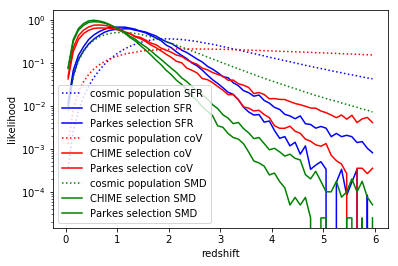

In [10]:
from time import time
t0 = time()

ASKAP_population = PreFRBLE_population.copy()
ASKAP_population['z_max'] = 1.3

N = 1e7
#N = 1e5
for population, color in zip( populations, ['blue','red','green']):
    # Generate an FRB population
    cosmic_pop = CosmicPopulation(N, name=population, n_model=populations_FRBpoppy[population], **PreFRBLE_population )
#    cosmic_pop = CosmicPopulation(N, name=population, n_model=populations_FRBpoppy[population], **ASKAP_population )
    
    print( 'cosmic: %i =? %i' % ( len(cosmic_pop.frbs.z), N  ) )
    
    P, x = Histogram(cosmic_pop.frbs.z, density=True, bins=60, range=[0,6])
    plt.plot( x[:-1]+np.diff(x)/2, P, label='cosmic population '+population, linestyle=':', color=color)
    
    Write2h5( likelihood_file_redshift, [P,x], [ KeyRedshift( population, "None", axis )  for axis in ["P","x"] ] )
    
    for telescope in telescopes[1:]:
#    for telescope in telescopes[:1]:
        
        #Setup a survey
        survey = Survey( telescopes_FRBpoppy[telescope] )
        # Observe the FRB population
        survey_pop = SurveyPopulation(cosmic_pop, survey, rate_limit=False)
    
        print( '%s: %i, %f' % ( telescope, len(survey_pop.frbs.z), float(len(survey_pop.frbs.z))/N  ) )
    
        P, x = Histogram(survey_pop.frbs.z, density=True, bins=60, range=[0,6])
        survey_pop = 0
        plt.plot( x[:-1]+np.diff(x)/2, P, label=telescope+' selection '+population, color=color)
    
        Write2h5( likelihood_file_redshift, [P,x], [ KeyRedshift( population, telescope, axis )  for axis in ["P","x"] ] )
    cosmic_pop = 0
plt.yscale('log')
plt.xlabel('redshift')
plt.ylabel('likelihood')
plt.legend()

print( "this took %.2f minutes" % ( (time()-t0)/60 ) )


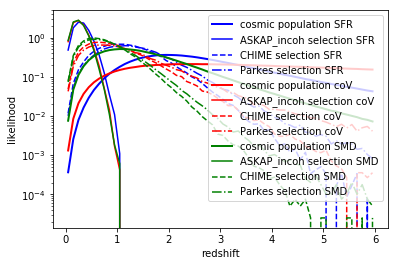

In [11]:
for population, color in zip( populations, ['blue','red','green']):
    #population = populations_FRBpoppy[population]
    P, x = GetLikelihood_Redshift( population=population, telescope='None')
    plt.plot( x[:-1]+np.diff(x)/2, P, label='cosmic population '+population, linestyle='-', color=color, linewidth=2)
    
    for telescope, linestyle in zip( telescopes, ['-','--','-.',':']):
        #telescope = telescopes_FRBpoppy[telescope]
        P, x = GetLikelihood_Redshift( population=population, telescope=telescope)
        plt.plot( x[:-1]+np.diff(x)/2, P, label=telescope+' selection '+population, color=color, linestyle=linestyle)

plt.yscale('log')
plt.xlabel('redshift')
plt.ylabel('likelihood')
plt.legend()

In [3]:
for telescope in telescopes:
    print(telescope)
    survey = Survey( telescopes_FRBpoppy[telescope] )

ASKAP
ASKAP_incoh
CHIME
Parkes


In [14]:
with h5.File( likelihood_file_redshift ) as f:
    print( f.keys() )

<KeysViewHDF5 ['SFR', 'SMD', 'coV']>


In [ ]:
his